# Exam 2 - October 2023 - EDA, Preprocessing, Statistics and Visualization - Solution

Amidst the pandemic many people lost their jobs. The dataset you will use for this part makes it possible for more people in need can find employment.
This dataset was created by picklesueat and contains more than 2000 job listing for data positions.
We will try to predict the Salary Estimation (bottom value of a range).

Source: https://www.kaggle.com/andrewmvd/data-scientist-jobs

## Data Dictionary

**Job Title** - The job title

**Category** - The data category of the job

**Rank** - The job rank

**is_research** - Does the job involve research?

**Job Description**

**Rating** - Company rating in glassdoor (1-5)

**Company Name**

**City** - Job location city

**State** - Job location state/country

**Size** - Company size

**Type of ownership** - Company type of ownership

**Sector** - Sector of the company

**Revenue** - Revenue range of the company

**Competitors** - Competitors of the company

**Salary Estimate** - Bottom value of the salary estimate range

**Here are some helper functions for your use:**

In [1]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function takes a pandas DataFrame and a threshold (proportion of data),
    and returns the list of binary features from that DataFrame that have
    above the threshold proportion of samples with the same value, and thus
    should be considered redundant.
    '''
    redundant_cols = []

    for col in data.columns:
        # Check if the column is binary
        unique_vals = data[col].unique()
        if len(unique_vals) == 2 and all(val in [0, 1] for val in unique_vals):
            # Calculate the proportion of the most common value
            max_count_proportion = max(data[col].value_counts(normalize=True))
            if max_count_proportion > threshold:
                redundant_cols.append(col)

    return redundant_cols

<div class="alert alert-warning">
<b>Important:</b> Make sure you follow what we learned regarding what should be done on the train set and what should be done on the test set
</div>

<div class="alert alert-info">
<b>Note:</b> You should submit the answers to this question in a report format - everything you do should be documented, you should track the changes to the shape of your dataset, explain the business thought behind your decisions and make everything super clear
</div>

<div class="alert alert-warning">
<b>Important:</b> Do not perform actions that are not neccessary. Make sure there is a thought behind each step you take
</div>

## Questions:

### 1. Read the data file and explore it lightly. Include TWO basic data dictionary integrity checks that make sense on the entire dataframe before split into train and test.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# your code here
df = pd.read_csv('DataScientist-exam.csv')


In [4]:
df.sample(5)

,Job Title,Category,Rank,is_research,Job Description,Rating,Company Name,City,State,Size,Type of ownership,Sector,Revenue,Competitors,Salary Estimate
1121,Medical Laboratory Scientist - Immuno Diagnost...,Medical Laboratory Scientist,No Rank,0,Work Shift: EVENING\n\nWork Week: Varies\n\nJo...,4.1,Houston Methodist,Houston,TX,10000+ employees,Nonprofit Organization,Health Care,Unknown / Non-Applicable,"MD Anderson Cancer Center, Memorial Hermann He...",115
610,"Manager, Data Science - Native Shopping Analytics",Data Scientist,Manager,0,Honey is a fast-growing startup based in Los A...,4.4,Honey,Los Angeles,CA,201 to 500 employees,Subsidiary or Business Segment,Information Technology,$100 to $500 million (USD),NaN,229
1104,Data Engineer,Data Engineer,No Rank,0,"DATA ENGINEER – HOUSTON, TX\n\nWho We Are\n\nA...",NaN,m1neral,Houston,TX,Unknown,Company - Private,NaN,Unknown / Non-Applicable,NaN,98
1059,Cost Data Analyst,Data Analyst,No Rank,0,Job Title: Data Analyst\n\nLocation: Remote\n\...,3.8,Mondo,Houston,TX,51 to 200 employees,Company - Private,Business Services,$100 to $500 million (USD),"Robert Half, Insight Global",159
1480,Principal Data Scientist- Public Sector,Data Scientist,Principal,0,"*Introduction**As a Data Scientist at IBM, you...",3.7,IBM,Philadelphia,PA,10000+ employees,Company - Public,Information Technology,$10+ billion (USD),"Amazon, Accenture, Microsoft",135


In [5]:
df.shape

(3291, 15)

In [6]:
df.describe()

,is_research,Rating,Salary Estimate
count,3291.000000,2934.000000,3291.000000
mean,0.065634,3.793695,133.745974
std,0.247678,0.629552,45.613693
min,0.000000,1.000000,12.000000
25%,0.000000,3.400000,101.000000
50%,0.000000,3.800000,132.000000
75%,0.000000,4.200000,164.000000
max,1.000000,5.000000,296.000000


In [7]:
df.drop(columns = ['is_research','Rating','Salary Estimate']).describe()

,Job Title,Category,Rank,Job Description,Company Name,City,State,Size,Type of ownership,Sector,Revenue,Competitors
count,3291,3291,3291,3291,3291,3291,3291,3085,3085,2816,3085,967
unique,1594,15,13,3115,1842,174,11,8,14,25,13,380
top,Data Scientist,Data Scientist,No Rank,The U.S. Department of the Treasury has a dist...,Apple,New York,TX,10000+ employees,Company - Private,Information Technology,Unknown / Non-Applicable,"Google, Microsoft, Samsung Electronics"
freq,274,1150,2233,14,54,295,1065,798,1712,1046,1016,54


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3291 non-null   object 
 1   Category           3291 non-null   object 
 2   Rank               3291 non-null   object 
 3   is_research        3291 non-null   int64  
 4   Job Description    3291 non-null   object 
 5   Rating             2934 non-null   float64
 6   Company Name       3291 non-null   object 
 7   City               3291 non-null   object 
 8   State              3291 non-null   object 
 9   Size               3085 non-null   object 
 10  Type of ownership  3085 non-null   object 
 11  Sector             2816 non-null   object 
 12  Revenue            3085 non-null   object 
 13  Competitors        967 non-null    object 
 14  Salary Estimate    3291 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 385.8+ KB


In [9]:
df.isna().sum()

Job Title               0
Category                0
Rank                    0
is_research             0
Job Description         0
Rating                357
Company Name            0
City                    0
State                   0
Size                  206
Type of ownership     206
Sector                475
Revenue               206
Competitors          2324
Salary Estimate         0
dtype: int64

In [10]:
pd.concat([pd.DataFrame(df.isna().sum(), columns = ['number of nan values']),pd.DataFrame(df.isna().sum()/df.shape[0]*100, columns = ['% of nan values'])], axis = 1).sort_values(by = ['number of nan values'], ascending = False)

,number of nan values,% of nan values
Competitors,2324,70.616834
Sector,475,14.433303
Rating,357,10.847767
Size,206,6.259496
Type of ownership,206,6.259496
Revenue,206,6.259496
Job Title,0,0.000000
Category,0,0.000000
Rank,0,0.000000
is_research,0,0.000000


In [11]:
df.isna().sum(axis = 1).value_counts()

1    1820
0     951
2     224
6     206
3      90
dtype: int64

#### Data Integrity

We check that Ratings are between 1 and 5 as specified on the data dictionary :

In [55]:
assert(1 <= df.Rating.all() <= 5 )

We check that each salary estimation is positive :

In [56]:
assert df['Salary Estimate'].all() > 0

### 2. We are trying to predict what will be the salary offered for the jobs presented. According to this research question, what type of model (classificaion / regression / clustering) fits the business problem? explain.

As our target variable 'Salary Estimate' is a numerical continuous feature, the model that best fits the business problem is a regression model.

### 3. Split the data into train and test sets (no validation set)

#### 3.1 Specify your business logic behind this choice.
#### 3.2 Perform more integrity checks on the train set (2 checks max).

In [14]:
# your code here
X = df.drop(columns = ['Salary Estimate'])
y = df['Salary Estimate']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


We split our dataset randomly as we do not have any clustering in our data, neither any order between rows.
We put 20% of our data in our test set.
We use the random_state parameter to keep the same shuffle while we run this cell.

In [15]:
X_train.head()

,Job Title,Category,Rank,is_research,Job Description,Rating,Company Name,City,State,Size,Type of ownership,Sector,Revenue,Competitors
2985,Data Engineer- Sr. Specialist,Data Engineer,Senior,0,We Are Hiring\n\nData Engineer - Full-Time Day...,3.3,Ascension,Austin,TX,10000+ employees,Nonprofit Organization,Health Care,$100 to $500 million (USD),NaN
3245,Big Data Engineer,Data Engineer,No Rank,0,Qualifications:\n\nExperience developing enter...,3.7,Cognizant,Columbus,OH,10000+ employees,Company - Public,NaN,$10+ billion (USD),"Tata Consultancy Services, Accenture, Capgemini"
3247,Data Analyst Junior,Data Analyst,Junior,0,Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC",Columbus,OH,51 to 200 employees,Company - Private,Information Technology,$50 to $100 million (USD),NaN
436,Research Scientist,Research Scientist,No Rank,1,"This is a 1 year fixed-term, grant funded posi...",4.2,University of Southern California,Los Angeles,CA,10000+ employees,College / University,Education,$2 to $5 billion (USD),NaN
2659,Data Engineer,Data Engineer,No Rank,0,Position Senior Data Engineer Location Menlo P...,5.0,Indrasol,Menlo Park,CA,1 to 50 employees,Subsidiary or Business Segment,NaN,Unknown / Non-Applicable,NaN


In [16]:
X_train.shape

(2632, 14)

In [17]:
y_train.shape

(2632,)

In [18]:
X_test.shape

(659, 14)

#### Data integrity on the train set

We check that the 'is_research' feature is a binary feature with values = 0 or 1 as specified on the data dictionary :

In [19]:
assert set(X_train.is_research) == {0,1}

We check that the type of values in the feature 'Company Name' is object :

In [20]:
assert isinstance(X_train['Company Name'].all(),object)

$\color{blue}{\text{From this point forward, **do not** work on whole dataset. Some things below are required only on train, and some both on train and test separately. e.g. if you transform the train set, make the needed change in the test set as well}}$

### 4. Feature Distribution

#### 4.1 Divide the features into categorical (nominal / ordinal) and numerical features, in a markdown cell. If there are clearly not useful features or features we are not allowed to use, drop them at this point.

**If all of the values in a column are unique / almost unique, include them under the "Index" category**

#### 4.2 Plot the distribution per feature. Use the appropriate plot per type of feature

#### 4.1

Not useful features :

The feature 'Job Description' won't give us any relevant information to predict the salary.

The feature 'Job Title' is redundant as it is a mix of the feature 'Category' and 'Rank'.

The feature 'Competitors' won't give us any relevant information to predict the salary.
Moreover, we have too many differents values (332) and the value that appears the most appears only 45 times.

67% of the feature 'Rank' has a value 'No Rank' so this feature will not give us any relevant informations so we can drop it.

The feature 'Company Name' which belongs to the index category can be dropped as it will not give us any relevant informations as most of the value are unique.

In [21]:
X_train.Competitors.value_counts()[:10]

Google, Microsoft, Samsung Electronics                                                  45
Amazon, Accenture, Microsoft                                                            40
Google, Microsoft, Walmart                                                              36
Google, Microsoft, Apple                                                                22
Cigna, Aetna, UnitedHealth Group                                                        15
MD Anderson Cancer Center, Memorial Hermann Health System, Texas Children's Hospital    13
Walt Disney Company, NBCUniversal                                                       10
GEICO, MetLife, State Farm                                                              10
Northwestern Mutual, State Farm                                                          9
Pfizer, AstraZeneca, Merck                                                               8
Name: Competitors, dtype: int64

In [22]:
X_train.Rank.value_counts()/X_train.shape[0]

No Rank       0.675532
Senior        0.186170
Lead          0.027356
Principal     0.023176
Associate     0.018997
Manager       0.015578
Junior        0.015198
Architect     0.014818
Director      0.009119
Intern        0.007599
Consultant    0.003419
Doctoral      0.002280
Head of       0.000760
Name: Rank, dtype: float64

In [23]:
X_train['Company Name'].value_counts()[:10]

Apple                               45
IBM                                 37
Amazon                              36
Staffigo Technical Services, LLC    26
Facebook                            22
Diverse Lynx                        20
Solekai Systems Corp                19
Varsity Tutors                      17
Humana                              15
Houston Methodist                   13
Name: Company Name, dtype: int64

In [24]:
# your code here
X_train.drop(columns = ['Job Description','Job Title','Competitors','Rank','Company Name'], inplace = True)
X_test.drop(columns = ['Job Description','Job Title','Competitors','Rank','Company Name'], inplace = True)

categorical nominal features : 'Job Description','Job Title','Category','City','State','Type of ownership','Sector',

categorical ordinal features : 'Rank','is_research','Size','Revenue'

numerical continuous features : 'Rating','Salary Estimate'

numerical discrete features : -

Index features : 'Company Name', 'Competitors'

#### 4.2 : Plot of features distribution

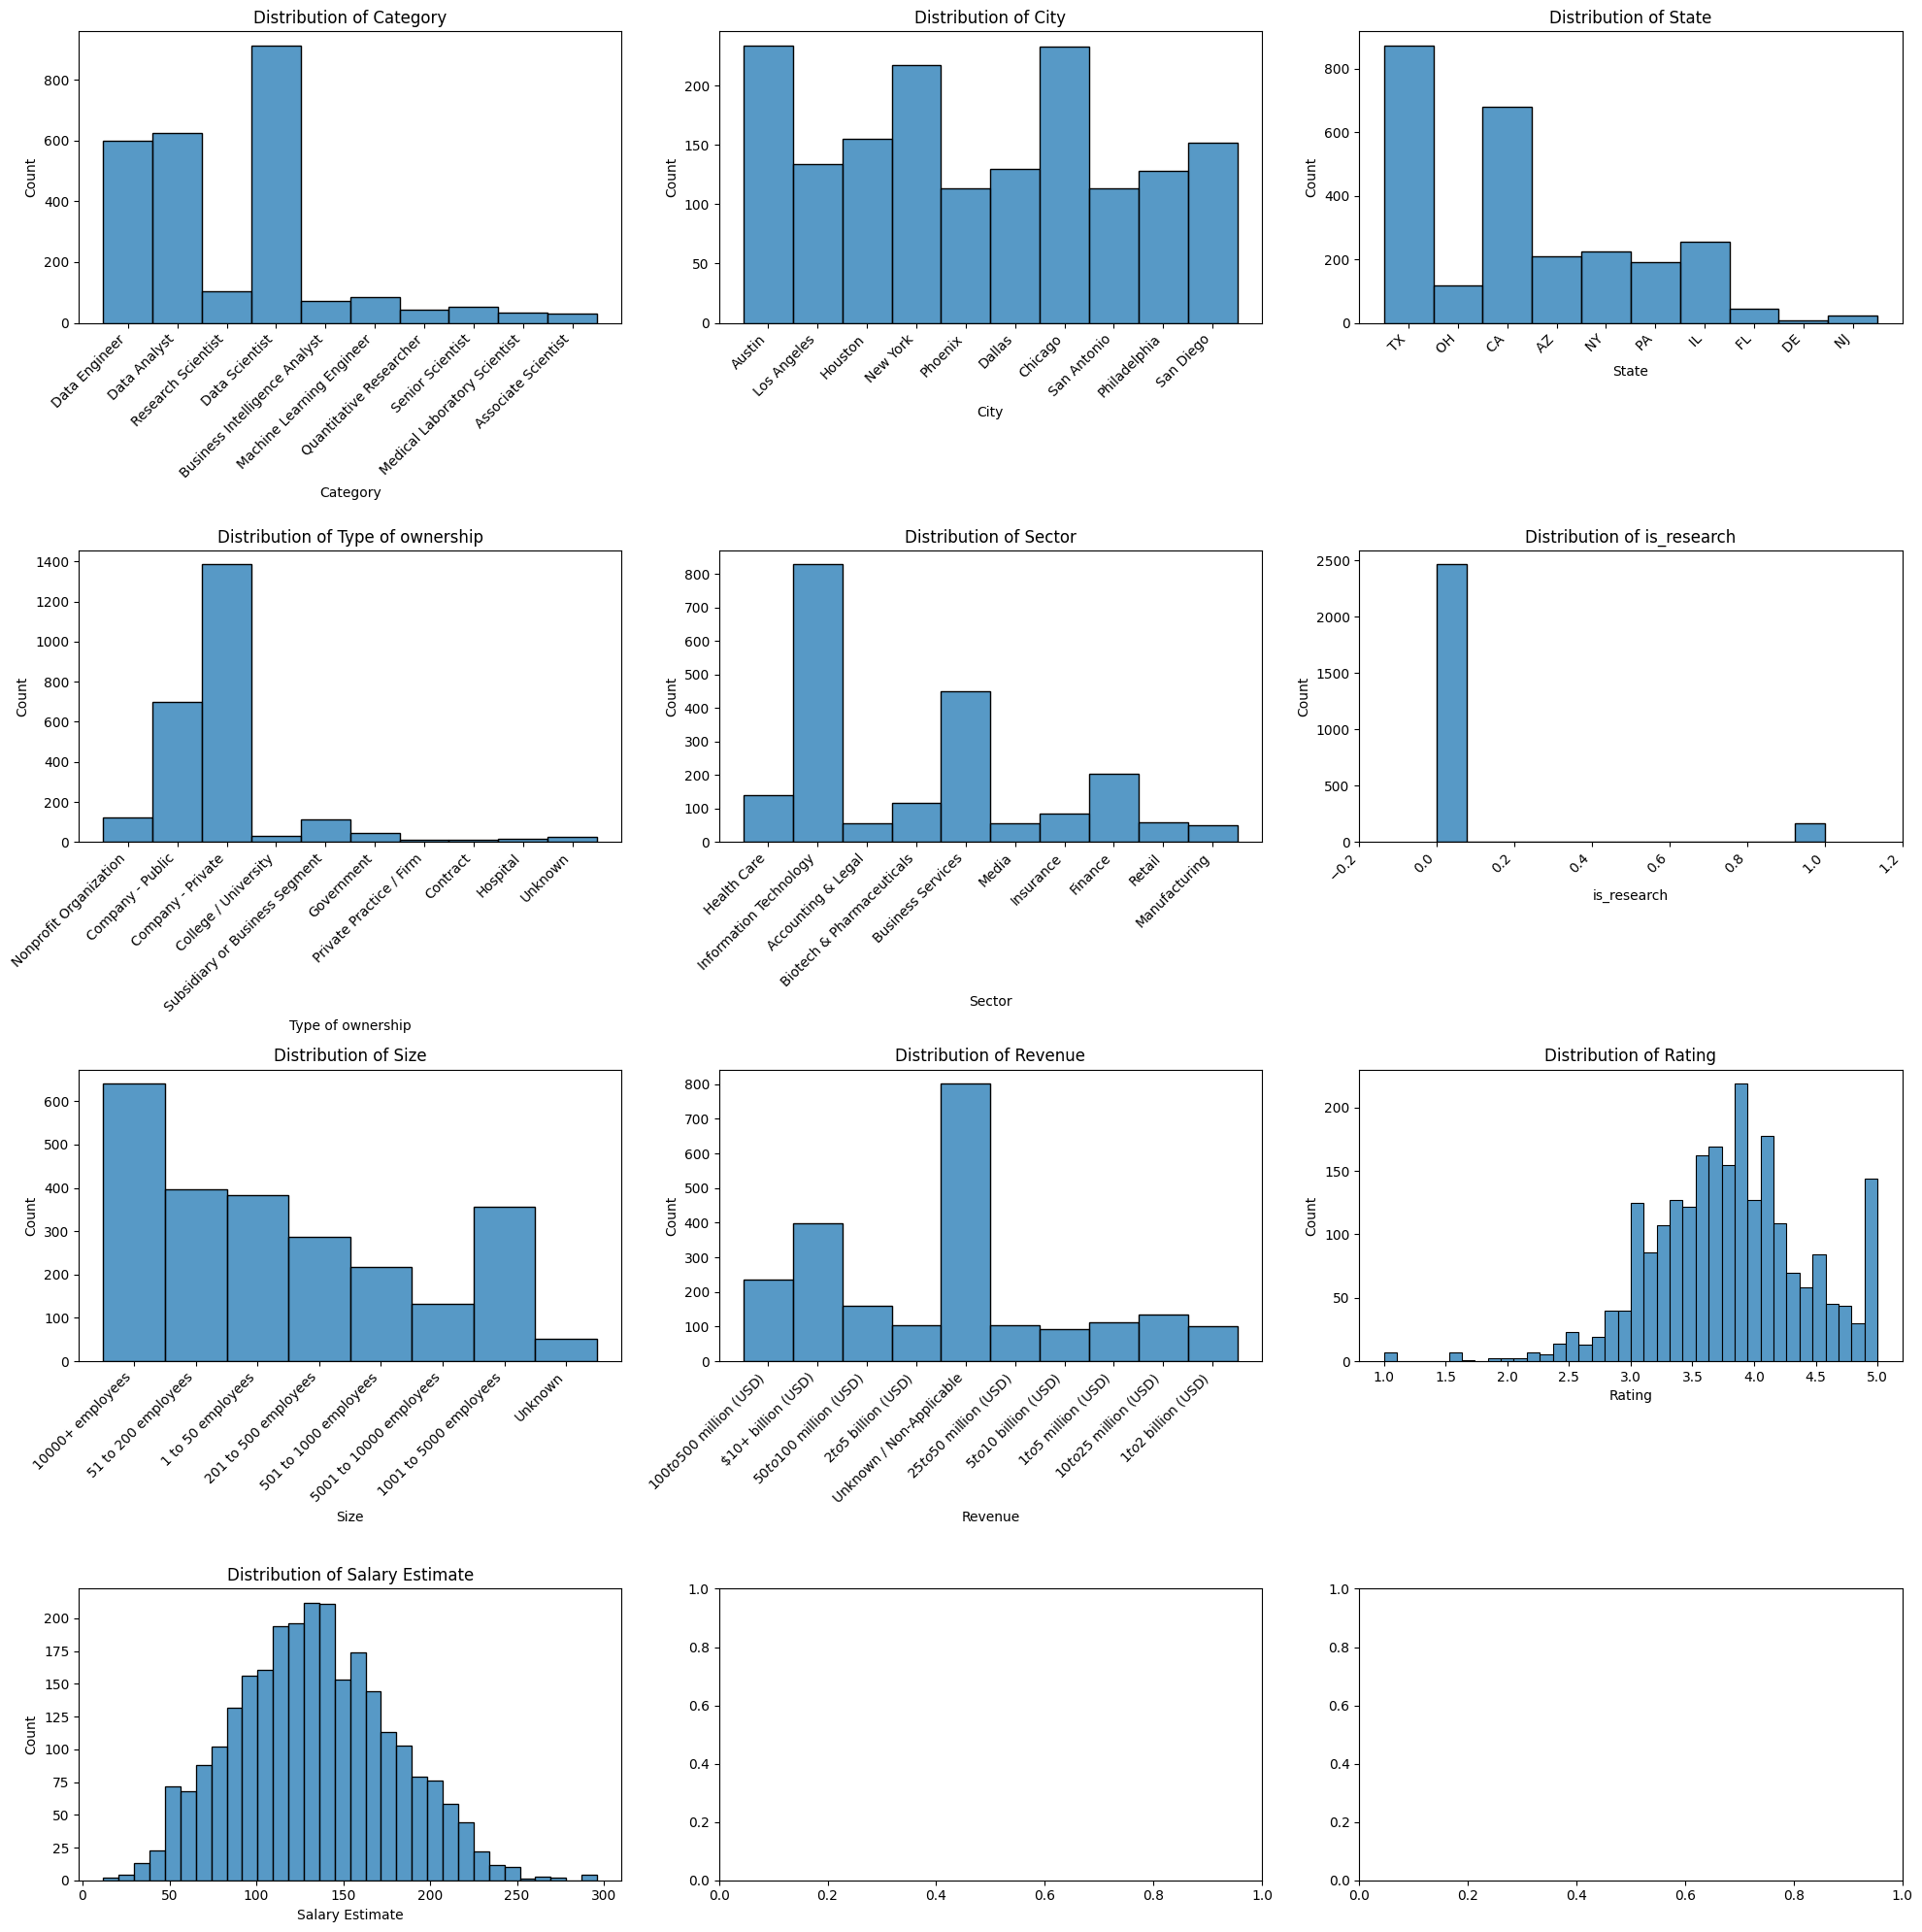

In [25]:
cat_nom = ['Category','City','State','Type of ownership','Sector']
cat_ord = ['is_research','Size','Revenue']
num_cont = ['Rating','Salary Estimate']

f, axes = plt.subplots(4,3,figsize = (20,20))
axes = axes.flatten()

for index,column in enumerate(cat_nom + cat_ord + num_cont):
  if column in cat_nom + cat_ord :
    top_n = 10
    top_values = X_train[column].value_counts().nlargest(top_n).index
    sns.histplot(x = X_train[X_train[column].isin(top_values)][column], ax = axes[index])
    axes[index].set_xticks(axes[index].get_xticks())
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation = 45, ha = 'right')
  elif column == 'Rating':
    sns.histplot(x = X_train[column], ax = axes[index])
  else:
    sns.histplot(x = y_train, ax = axes[index])
  axes[index].set_title(f'Distribution of {column}')
  axes[index].set_xlabel(f'{column}')

plt.tight_layout()
plt.show()


### 5. What can be a baseline model for this dataset? (use the appropriate metric)

In this dataset, a baseline model can be a model that predict every salary to be the mean of the feature 'Salary Estimate' in the dataset

In [26]:
baseline_salary = y_train.mean()
y_base_pred = [baseline_salary]*len(y_train)

mae = mean_absolute_error(y_train,y_base_pred)
mae

36.576029127132976

In [27]:
y_train.median()

132.0

## **Take the next steps on <span style="color:red">both datasets</span>, according to the restrictions you learned.**

### 6. Missing Vaules - Handle 3 columns with missing values, explaining the business logic behind your choices.

#### 6.1 Discuss NAs in the rows, and explain your logic behind taking care / not taking care of it.

In [28]:
# your code here
X_train.isna().sum()

Category               0
is_research            0
Rating               289
City                   0
State                  0
Size                 165
Type of ownership    165
Sector               379
Revenue              165
dtype: int64

We handle missing values of those features : 'Size','Type of ownership, 'Revenue'.

For those 3 features, we have a value referencing to the fact that we do not know the value : unknown.
In a business logic, we can then fill missing values of those features with the corresponding 'unknown' value of the feature.

In [29]:
X_train.Size.fillna('Unknown', inplace = True)
X_test.Size.fillna('Unknown', inplace = True)

In [30]:
X_train['Type of ownership'].fillna('Unknown', inplace = True)
X_test['Type of ownership'].fillna('Unknown', inplace = True)

In [31]:
X_train.Revenue.fillna('Unknown / Non-Applicable', inplace = True)
X_test.Revenue.fillna('Unknown / Non-Applicable', inplace = True)

##### 6.1 : Nas in the rows :

In [32]:
X_train.isna().sum(axis=1).sort_values(ascending = False)

2616    2
220     2
2987    2
1122    2
3002    2
       ..
2600    0
2694    0
20      0
1684    0
3174    0
Length: 2632, dtype: int64

We see that we have a maximum of 2 Nan values per rows. We have 11 features in X_train so those rows should not be deleted.

### 7. Take care of outliers (if any). Specify the business logic behind your choice. You need to take care of a minimum of 2 columns.

'Rating' : We can see that the distribution of the feature 'Rating' is similar to a normal distribution. It is then relevant to use the std method to deal with outliers.
We will clip outliers to the lower_bound if the data is lower than the lower_bound and to the upper_bound if the data is higher than the upper_bound.

In [33]:
# your code here
mean_rat = X_train.Rating.mean()
std_rat = X_train.Rating.std()

lower_bound = mean_rat - 3 * std_rat
upper_bound = mean_rat + 3 * std_rat


X_train.loc[X_train.Rating < lower_bound,'Rating'] = lower_bound.round(1)
X_train.loc[X_train.Rating > upper_bound,'Rating'] = upper_bound.round(1)

X_test.loc[X_test.Rating < lower_bound,'Rating'] = lower_bound.round(1)
X_test.loc[X_test.Rating > upper_bound,'Rating'] = upper_bound.round(1)

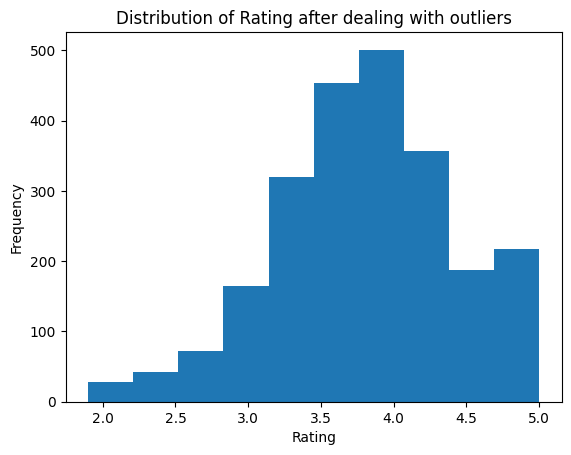

In [34]:
plt.figure()
X_train.Rating.plot(kind = 'hist')
plt.title('Distribution of Rating after dealing with outliers')
plt.xlabel('Rating')
plt.show()

'Salary Estimate' : We can see that the distribution of the feature 'Salary Estimate' is similar to a normal distribution. It is then relevant to use the std method to deal with outliers. We will clip outliers to the lower_bound if the data is lower than the lower_bound and to the upper_bound if the data is higher than the upper_bound.

In [35]:
mean_se = y_train.mean()
std_se = y_train.std()

lower_bound = mean_se -3 * std_se
upper_bound = mean_se +3 * std_se

y_train[y_train > upper_bound] = upper_bound.round(1)
y_train[y_train < lower_bound] = lower_bound.round(1)



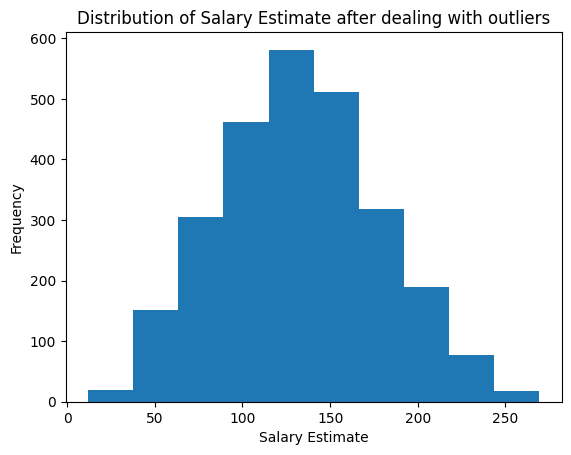

In [36]:
plt.figure()
y_train.plot(kind = 'hist')
plt.title('Distribution of Salary Estimate after dealing with outliers')
plt.xlabel('Salary Estimate')
plt.show()

### 8. Plot the distribution of 3 variables  (3 plots overall) of your choice against the dependent variable - summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.

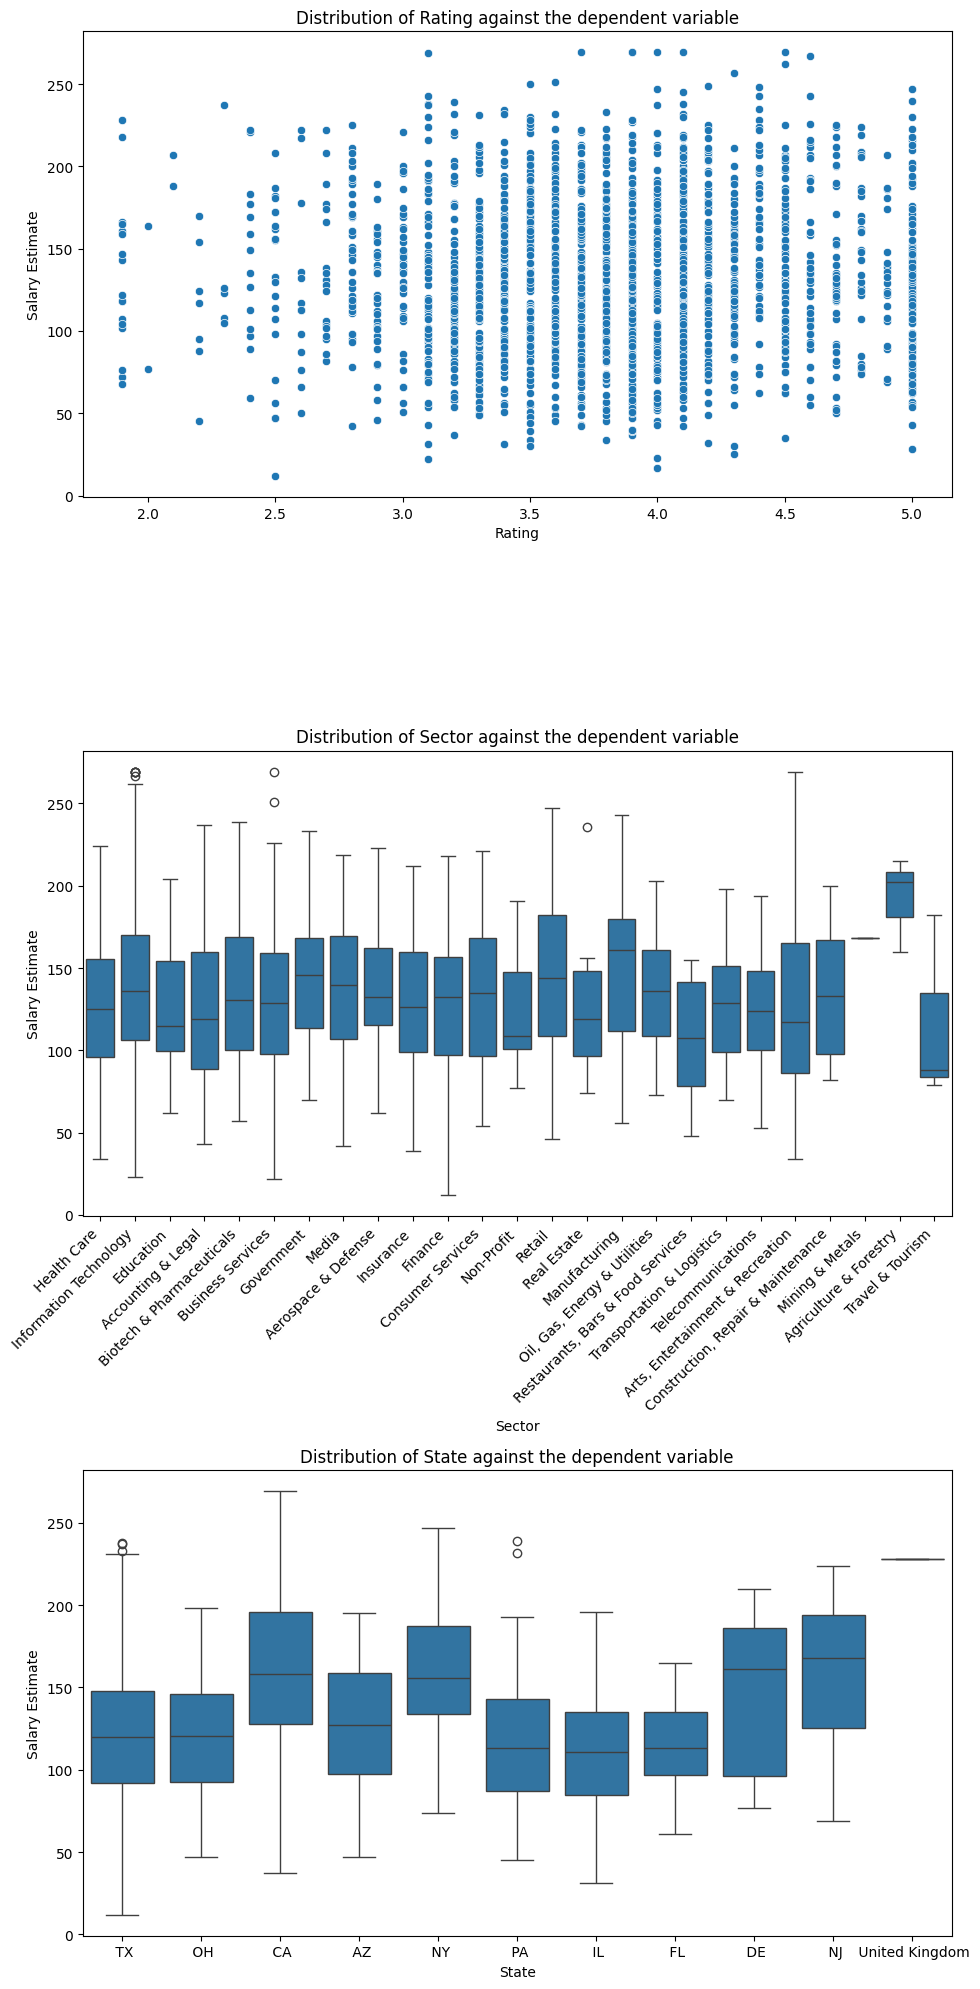

In [37]:
# your code here
f,axes = plt.subplots(3,1, figsize = (10,20))
axes = axes.flatten()
sns.scatterplot(y= y_train,x = X_train.Rating, ax = axes[0])
axes[0].set(title = 'Distribution of Rating against the dependent variable')

sns.boxplot(x = X_train.Sector, y = y_train, ax = axes[1])
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45, ha = 'right')
axes[1].set(title = 'Distribution of Sector against the dependent variable')

sns.boxplot(y = y_train, x = X_train.State,ax = axes[2])
axes[2].set(title = 'Distribution of State against the dependent variable')

plt.tight_layout()
plt.show()


On the first plot, we can see that Rating does not give much of relevant informations about the salary estimation.

On the second plot, we can see that the sector 'Retail' and 'Agriculture & Forestry' are overall the most paid sectors.
The 'Restaurants,Bars & Food Services' is the less paid sector.
The sector 'Information Technology' and 'Arts, Entertainment & Recreation' have a very skewed distribution.
In general, we can see that the median of salary estimate for each sector is quite homogeneous.

On the third plot, we can see that the median of salary estimate is very different between States.
The most paid State overall are CA, NJ and NY.
The state IL and FL are the less paid.

### 9. Plot the distribution of 3 independent variables against each other (2 at a time, 3 plots overall), try to include a representation for the dependent variable if possible.

**summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.**

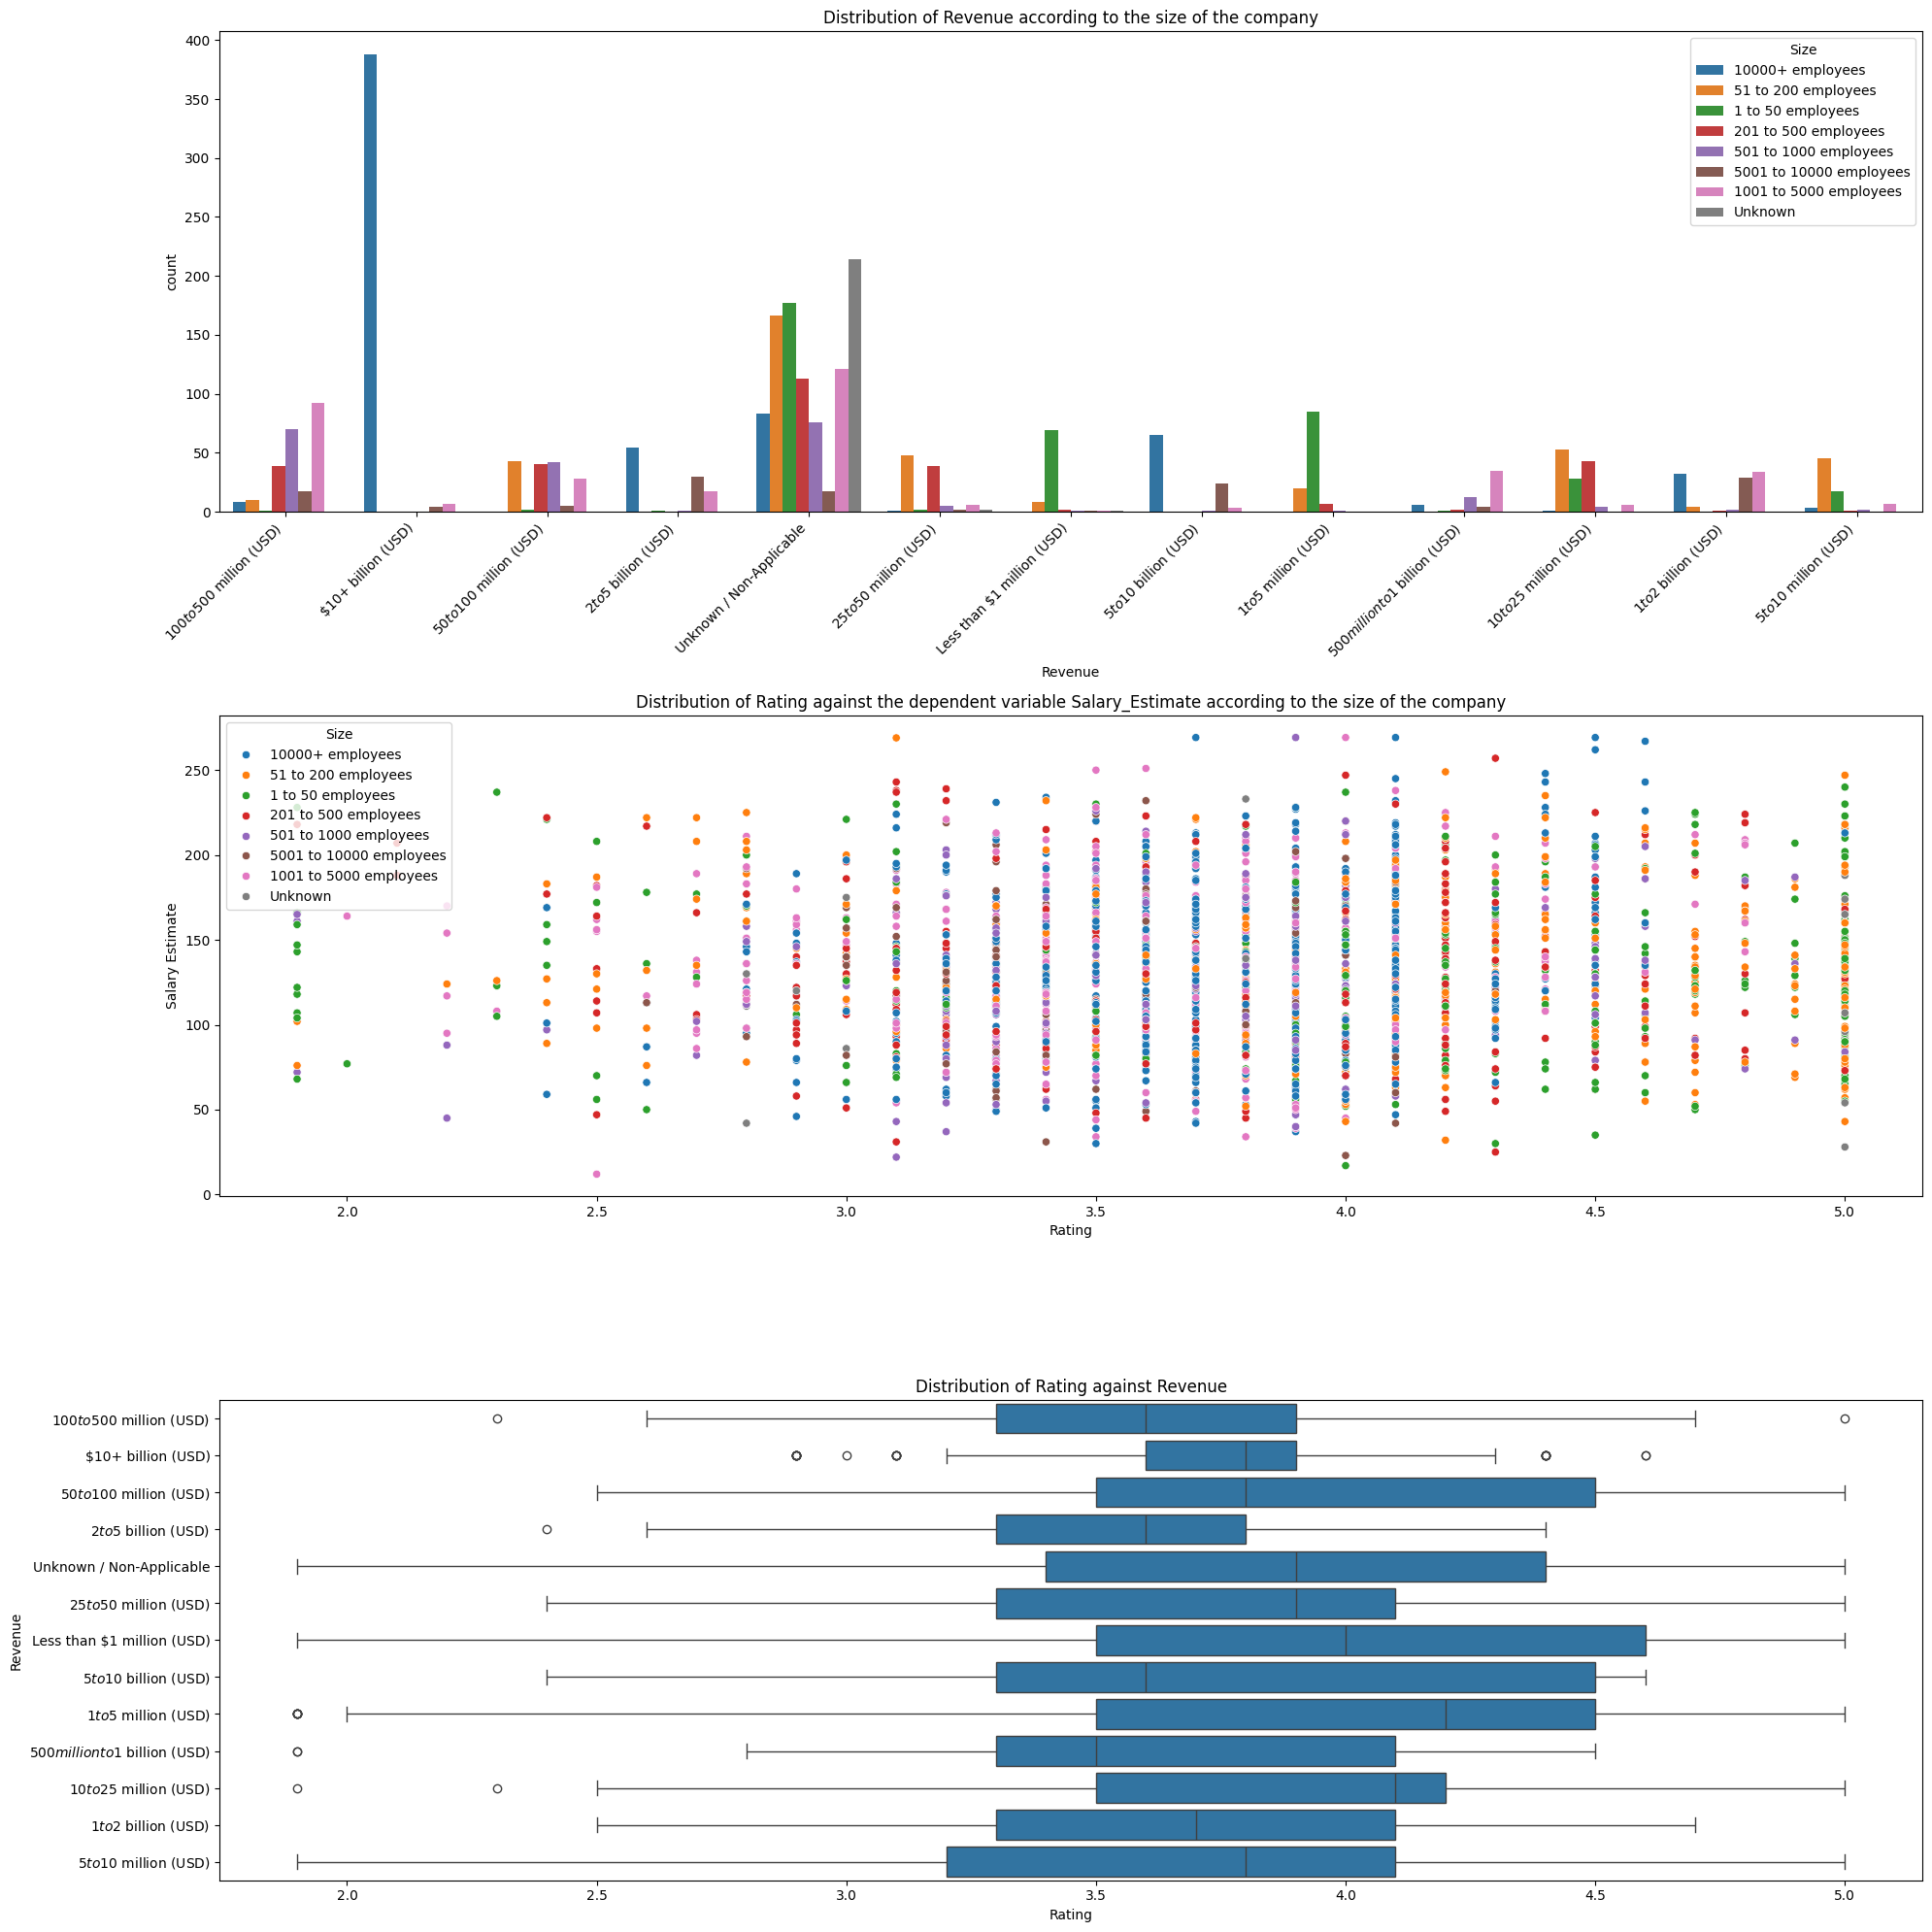

In [38]:
# your code here
f, axes = plt.subplots(3,1, figsize = (20,20))
axes = axes.flatten()

sns.countplot(data = X_train, x ='Revenue', hue = 'Size', ax = axes[0])
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45, ha = 'right')
axes[0].set(title = 'Distribution of Revenue according to the size of the company')

sns.scatterplot(data = X_train, x = 'Rating', y = y_train, hue = 'Size',ax = axes[1])
axes[1].set(title = 'Distribution of Rating against the dependent variable Salary_Estimate according to the size of the company')

sns.boxplot(data = X_train, x = 'Rating', y = 'Revenue', ax = axes[2])
axes[2].set(title = 'Distribution of Rating against Revenue')

plt.tight_layout()
plt.show()

On the first plot, we can see that the more the company has high revenues, the more it has employees. Companies with billions of revenus have mostly more than 10000 employees.

On the second plot, we can see that companies with high rating are companies with 51 to 200 employees. However, it does not tell much about the salary estimate.

On the third plot, we can see that companies with high rating are those with the less revenue.

### 10. Transform 4 categorical features (prepare them for a model - explain the business logic)

Firstly, we will deal with nan values of 'Rating' and 'Sector'.

We fill nan values of 'Sector' with unknown.

In [39]:
X_train.Sector.fillna('Unknown', inplace = True)
X_test.Sector.fillna('Unknown', inplace = True)

We fill nan values of 'Rating' with the median of the feature.

In [40]:
X_train.Rating.fillna(X_train.Rating.median(), inplace = True)
X_test.Rating.fillna(X_train.Rating.median(), inplace = True)

First, we will transform the categorical ordinal features 'Size' and 'Revenue' with the OrdinalEncoder as those features have an order.

In [41]:
oe = OrdinalEncoder(categories = [['Unknown','1 to 50 employees','51 to 200 employees','201 to 500 employees',
                                  '501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees',
                                  '10000+ employees']])

oe.fit(X_train[['Size']])
X_train['size_sklearn']= oe.transform(X_train[['Size']])
X_test['size_sklearn'] = oe.transform(X_test[['Size']])

X_train.drop(columns = ['Size'], inplace = True)
X_test.drop(columns = ['Size'], inplace = True)

In [42]:
oe_rev = OrdinalEncoder(categories = [['Unknown / Non-Applicable','Less than $1 million (USD)','$1 to $5 million (USD)',
                                   '$5 to $10 million (USD)','$10 to $25 million (USD)','$25 to $50 million (USD)',
                                   '$50 to $100 million (USD)','$100 to $500 million (USD)','$500 million to $1 billion (USD)',
                                   '$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)']])

oe_rev.fit(X_train[['Revenue']])
X_train['revenue_sklearn']= oe_rev.transform(X_train[['Revenue']])
X_test['revenue_sklearn'] = oe_rev.transform(X_test[['Revenue']])

X_train.drop(columns = ['Revenue'], inplace = True)
X_test.drop(columns = ['Revenue'], inplace = True)

Then, we transform the categorical nominal features with the OneHotEncoder as order do not matter for those features.

In [43]:
X_train = pd.get_dummies(X_train, columns = cat_nom)
X_test = pd.get_dummies(X_test, columns = cat_nom)

We need to check if we have some columns to add to X_test or to drop from X_train

In [44]:
cols_to_add = set(X_train.columns) - set(X_test.columns)
for col in cols_to_add:
  X_test[col] = 0


In [45]:
assert set(X_train.columns) - set(X_test.columns) == set()

In [46]:
cols_to_del = set(X_test.columns) - set(X_train.columns)
for col in cols_to_del:
  del X_test[col]

In [47]:
assert set(X_test.columns) - set(X_train.columns) == set()

### 11. Generate a correlation matrix and plot a heat map of it. What can you say about the correlations?

**BE MINDFUL OF THE FEATURES YOU INCLUDE AND THE METHOD YOU USE**

Before plotting the correlation matrix, we will drop the uneeded features to have a readable matrix.

In [48]:
X_train_corr = pd.concat([X_train[['Rating','size_sklearn','revenue_sklearn']],y_train],axis=1).corr(method = 'spearman')
X_train_corr

,Rating,size_sklearn,revenue_sklearn,Salary Estimate
Rating,1.000000,-0.187476,-0.120333,0.043821
size_sklearn,-0.187476,1.000000,0.681124,0.044128
revenue_sklearn,-0.120333,0.681124,1.000000,0.001919
Salary Estimate,0.043821,0.044128,0.001919,1.000000


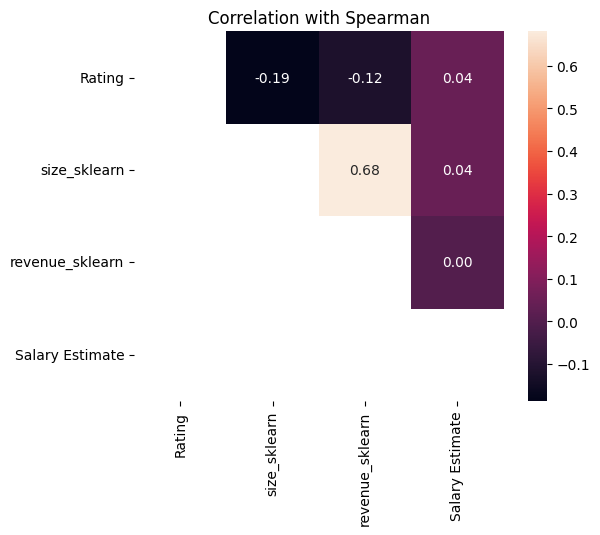

In [49]:
mask = np.tril(np.ones_like(X_train_corr, dtype=bool))
sns.heatmap(X_train_corr,
                 annot=True,
                 fmt=".2f",
                 mask = mask, square = True)

plt.title('Correlation with Spearman');


We can see that revenue and size are highly correlated, as we saw on plot before which make sense as it means that the more the company have employees the more it has high revenue.

We can also see that rating and size are negatively correlated as we saw on plot before, same for rating and revenue.

Independant features are not very correlated with the dependent feature.

### 12. Transform with numerical features according to a method of your choice  (explain the business logic)
**If you choose not to transform, include an elaborate explanation**

We know that the feature 'Rating' has value from 1 to 5 so we can use the min-max scaling to transform this feature.

In [50]:
# your code here
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train[['Rating']])
X_train[['Rating']] = mm_scaler.transform(X_train[['Rating']])
X_test[['Rating']] = mm_scaler.transform(X_test[['Rating']])

### 13. After all of the preprocesing above, we can see some redundancies. Drop any unneeded / uncared for features, so you are left only with features that we can use in a model (a model should be able to run with these final features). SEE HELPER FUNCTIONS if needed

In [51]:
for col in get_redundant_binary_cols(X_train,0.8):
  del X_train[col]
  del X_test[col]

In [52]:
X_train.shape

(2632, 11)

In [53]:
X_train.columns

Index(['Rating', 'size_sklearn', 'revenue_sklearn', 'Category_Data Analyst',
       'Category_Data Engineer', 'Category_Data Scientist', 'State_ CA',
       'State_ TX', 'Type of ownership_Company - Private',
       'Type of ownership_Company - Public', 'Sector_Information Technology'],
      dtype='object')

## (BONUS) 14. Choose a model that you learned in class, train it with the train set, and predict on the test set. Evaluate the model using appropriate metrics for this model. Is the model a success?

In [54]:
# your code here
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_preds = lr_model.predict(X_test)

mse_lr = np.sqrt(mean_squared_error(y_test,y_preds))
mse_lr

44.20252657813136

We get a mean squared error of around 44 which means that for each salary that we estimate, we make an error of 44000 which is very bad so the model is not a success.